# Lesson 3 | Connect to a Remote Repository on GitHub

Version control really comes into its own when we begin to collaborate with other people. We already have most of the machinery we need to do this; the only thing missing is to copy changes from one repository to another.

Systems like Git allow us to move work between any two repositories. In practice, though, it’s easiest to use one copy as a central hub, and to keep it on the web rather than on someone’s laptop. Most programmers use hosting services like GitHub, Bitbucket or GitLab to hold those main copies.

Let’s start by sharing the changes we’ve made to our current project with the world. To this end we are going to create a remote repository that will be linked to our local repository.


First, set your working directory for this lesson:

In [ ]:
%cd /home/jupyter/my_first_git_project

## Step 1: Create a remote repository

Log in to GitHub, then click on the icon in the top right corner to create a new repository called `penguins`.

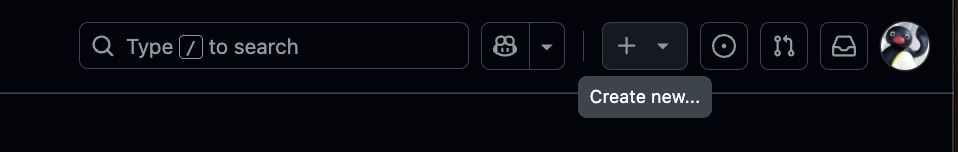

*Note: Since this repository will be connected to a local repository, it needs to be empty. Leave “Initialize this repository with a README” unchecked, and keep “None” as options for both “Add .gitignore” and “Add a license.” See the “GitHub License and README files” exercise below for a full explanation of why the repository needs to be empty.*

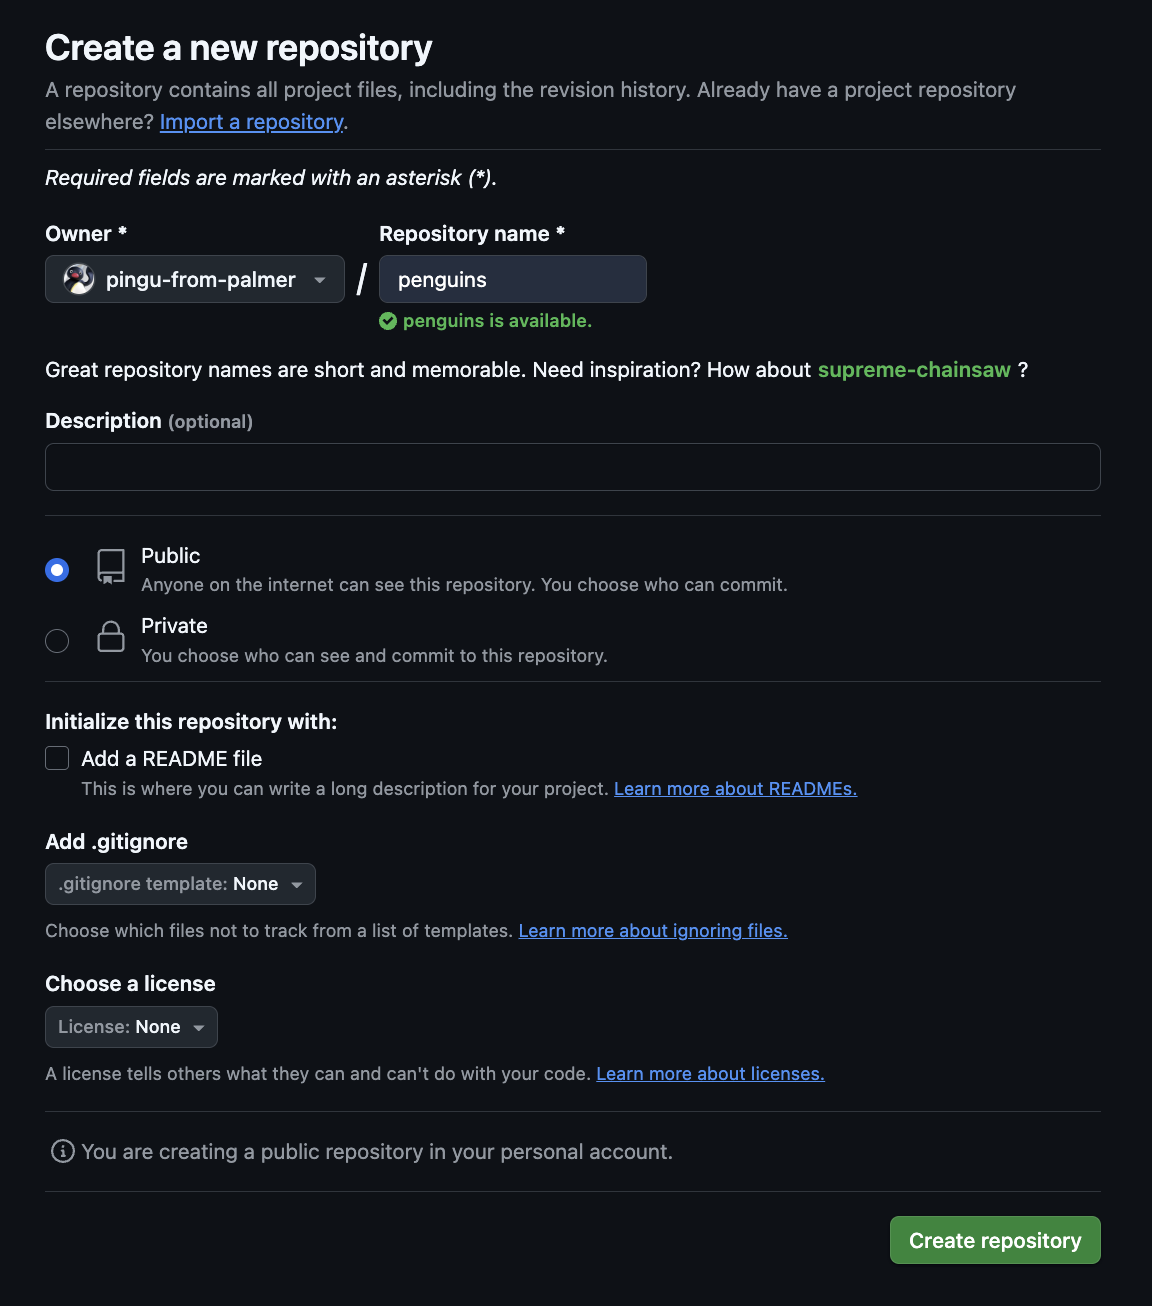

As soon as the repository is created, GitHub displays a page with a URL and some information on how to configure your local repository:

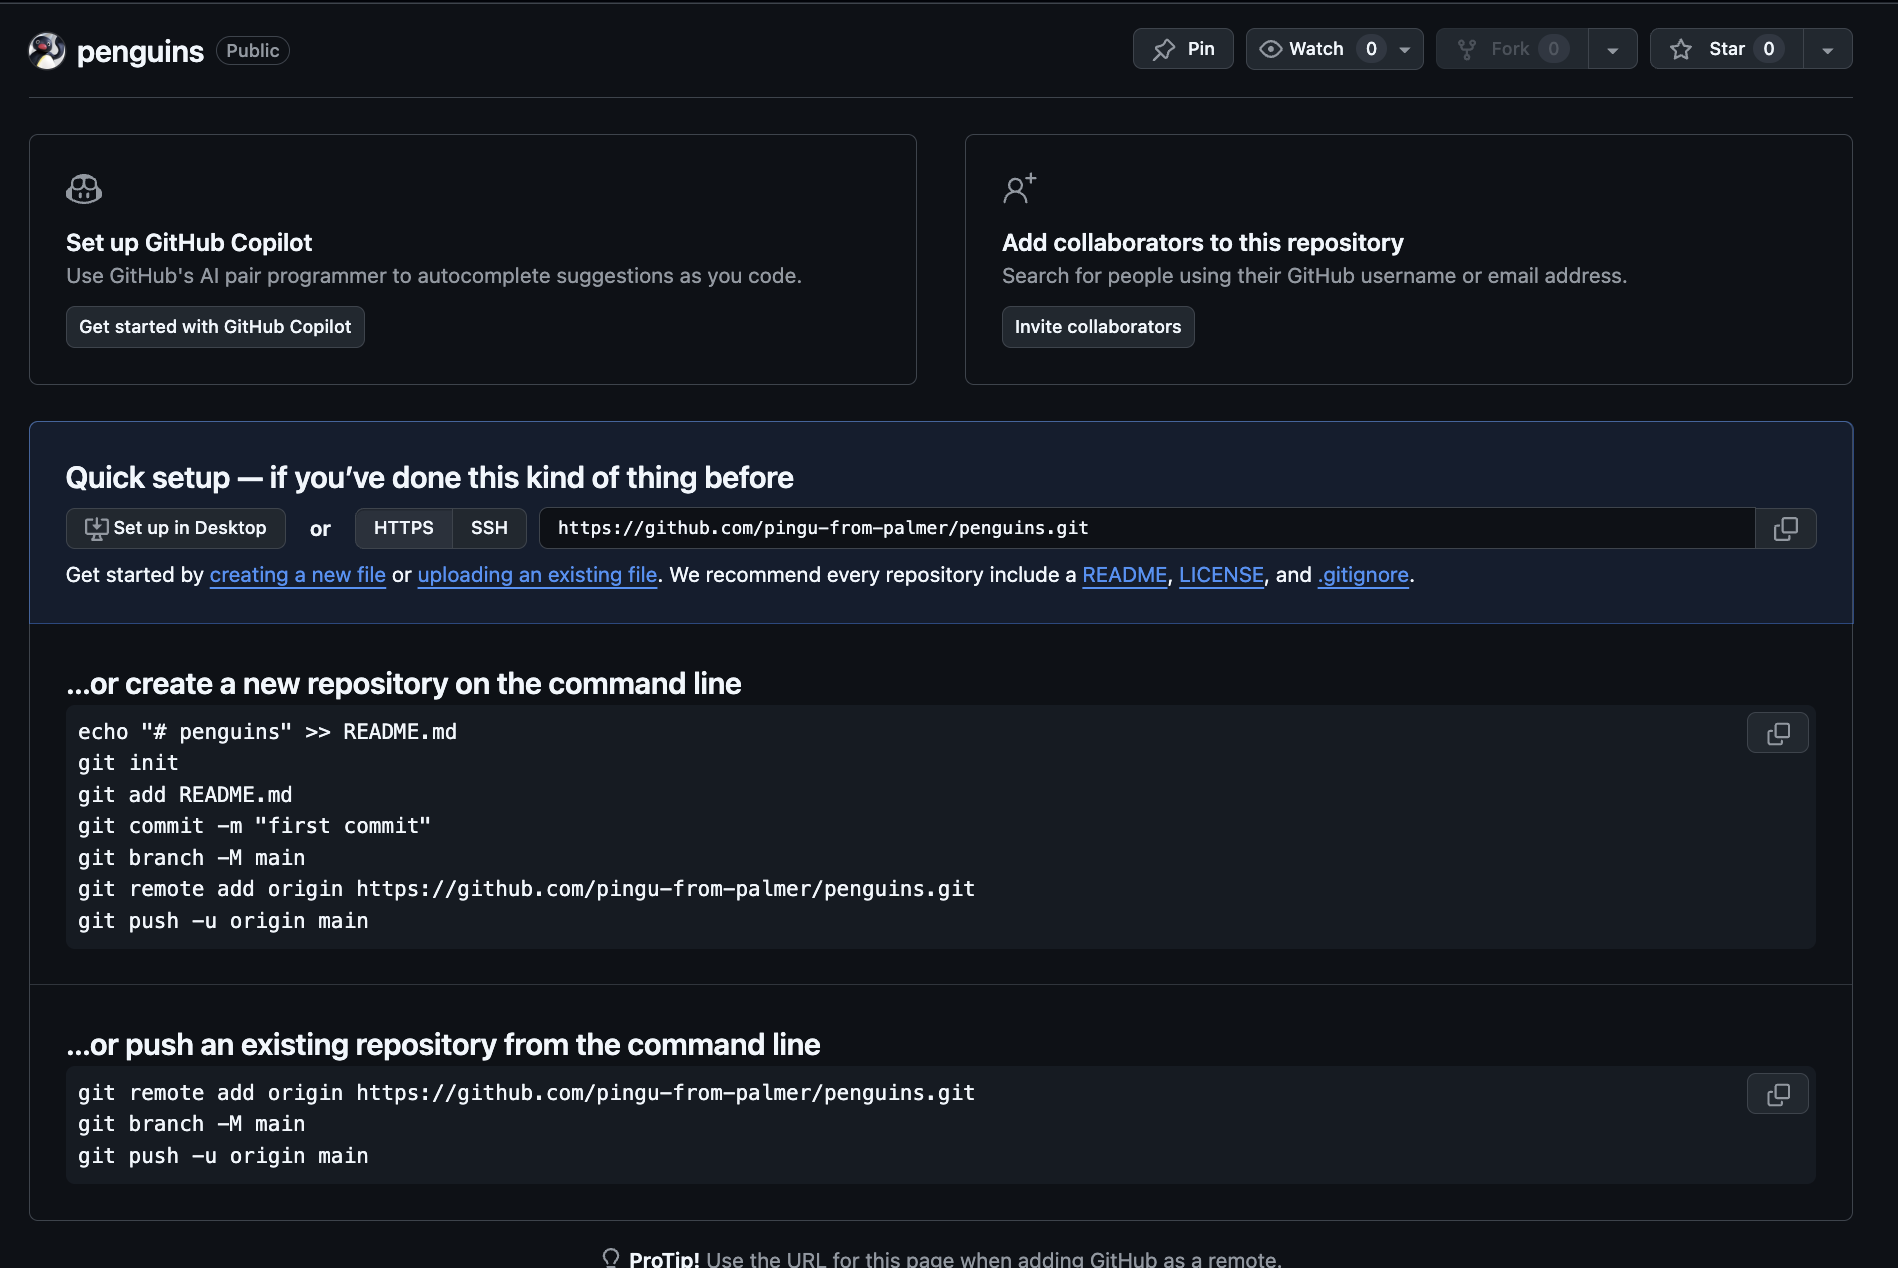

## Step 2: Connect local to remote repository

Now we connect the two repositories. We do this by making the GitHub repository a remote for the local repository. The home page of the repository on GitHub includes the URL string we need to identify it:

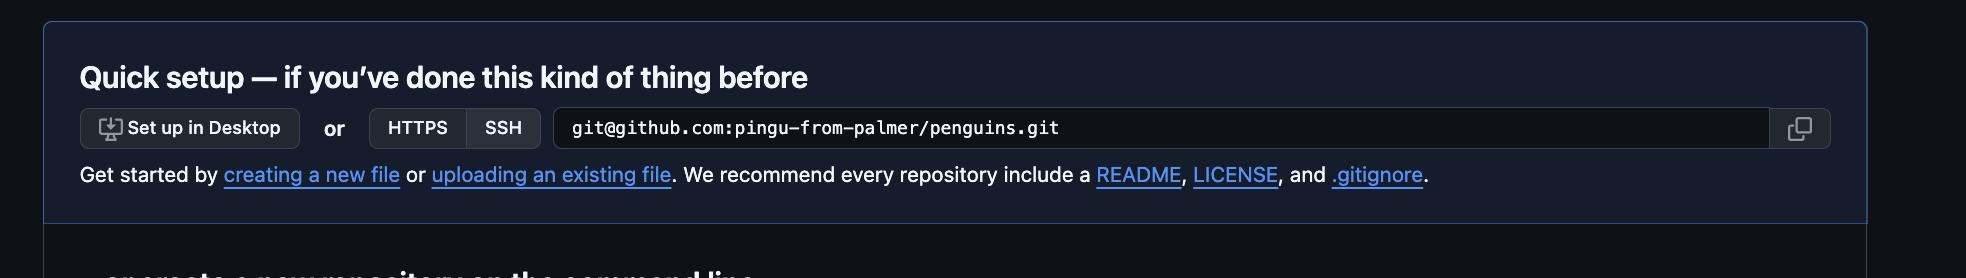

Click on the ‘SSH’ link to change the protocol from HTTPS to SSH.

*We use SSH here because, while it requires some additional configuration, it is a security protocol widely used by many applications. The steps below describe SSH at a minimum level for GitHub.*

Copy that URL from the browser and replace Pingu's information with your own, and run this command:

In [ ]:
!git remote add origin git@github.com:pingu-from-palmer/penguins.git

Make sure to use the ssh URL for your repository rather than Pingu's: the only difference should be your username instead of pingu-from-palmer.

```origin``` is a local name used to refer to the remote repository. It could be called anything, but ```origin``` is a convention that is often used by default in git and GitHub, so it’s helpful to stick with this unless there’s a reason not to.

We can check that the command has worked by running git remote -v:

In [ ]:
!git remote -v

## Step 3: SSH Background and Setup

Before you can connect to a remote repository, you needs to set up a way for your computer to authenticate with GitHub so it knows it’s you trying to connect to your remote repository.

We are going to set up the method that is commonly used by many different services to authenticate access on the command line. This method is called Secure Shell Protocol (SSH). SSH is a cryptographic network protocol that allows secure communication between computers using an otherwise insecure network.

SSH uses what is called a key pair. This is two keys that work together to validate access. One key is publicly known and called the public key, and the other key called the private key is kept private. Very descriptive names.

You can think of the public key as a padlock, and only you have the key (the private key) to open it. You use the public key where you want a secure method of communication, such as your GitHub account. You give this padlock, or public key, to GitHub and say “lock the communications to my account with this so that only computers that have my private key can unlock communications and send git commands as my GitHub account.”

What we will do now is the minimum required to set up the SSH keys and add the public key to a GitHub account.

We will run the ```ls``` command to check what key pairs already exist on your instance. *They won't as you are working from a brand new instance, but it is good practice to check this if you run this from your local computer*

In [ ]:
!ls -al ~/.ssh

As predicted, you do not have an .ssh file on your instance

## Step 4: Create an SSH key pair

### **Run this in your Terminal**

<blockquote>

To create an SSH key pair you will use this command, where the ```-t``` option specifies which type of algorithm to use and ```-C``` attaches a comment to the key (here, your email instead of Pingu's):

```
ssh-keygen -t ed25519 -C "pingu.from.palmer@gmail.com"
```
Output:

```
Generating public/private ed25519 key pair.
Enter file in which to save the key (/home/jupyter/.ssh/id_ed25519): 
```

Press Enter

Output:
```
Created directory '/home/jupyter/.ssh'.
Enter passphrase (empty for no passphrase): 
```

Here you can just press Enter twice as you are on your own private instance and don't need to password protecet this key pair. 

You will see a variation on the image below


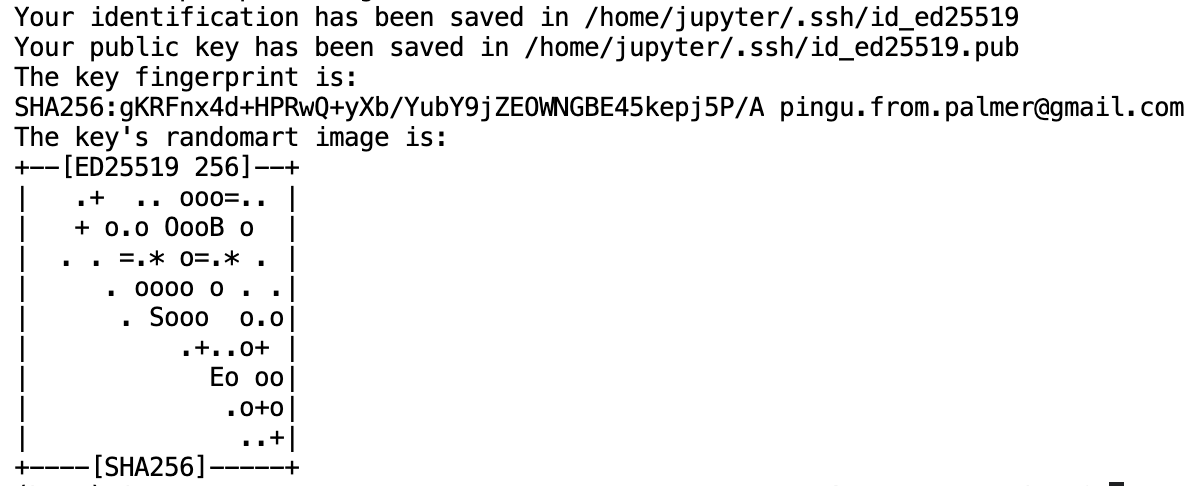
</blockquote>

The “identification” is actually the private key. You should never share it. The public key is appropriately named. The “key fingerprint” is a shorter version of a public key.

Now that we have generated the SSH keys, we will find the SSH files when we check.

In [ ]:
!ls -al ~/.ssh

## Step 5: Copy the public key to GitHub

### **Run this in your Terminal**

<blockquote>

Now we have a SSH key pair and we can run this command to check if GitHub can read our authentication.

`ssh -T git@github.com`

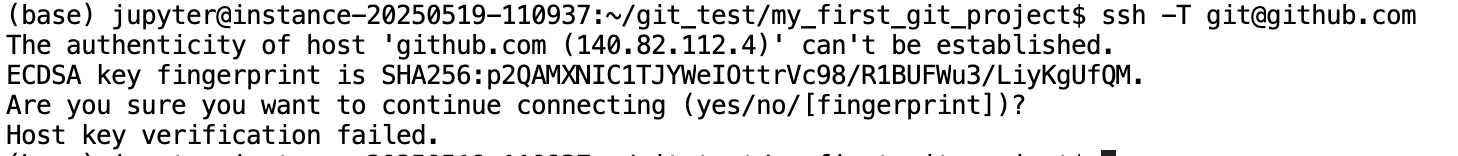


Right, we forgot that we need to give GitHub our public key!

First, we need to copy the public key. Be sure to include the .pub at the end, otherwise you’re looking at the private key.

In [ ]:
!cat ~/.ssh/id_ed25519.pub

Now, going to GitHub.com, click on your profile icon in the top right corner to get the drop-down menu. Click “Settings”, then on the settings page, click “SSH and GPG keys”, on the left side “Access” menu. Click the “New SSH key” button on the right side. 

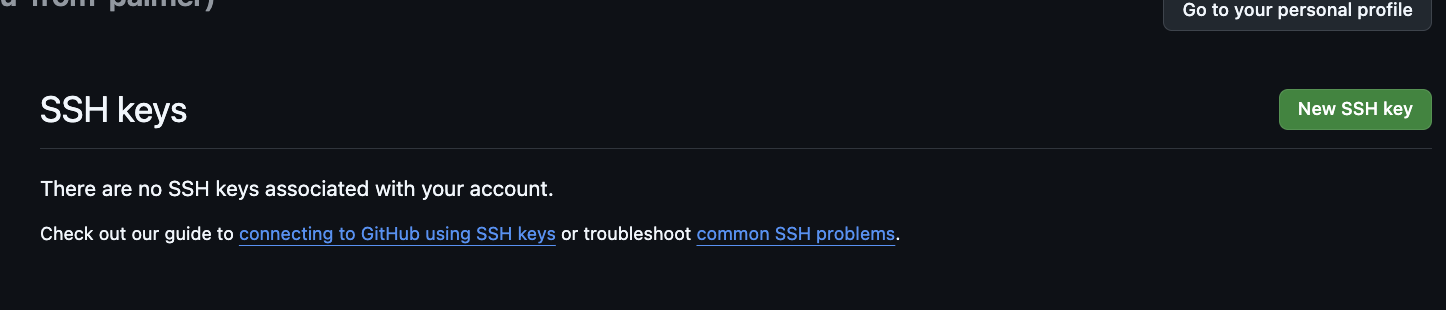

Now, you can add a name, paste your SSH key into the field, and click the “Add SSH key” to complete the setup.

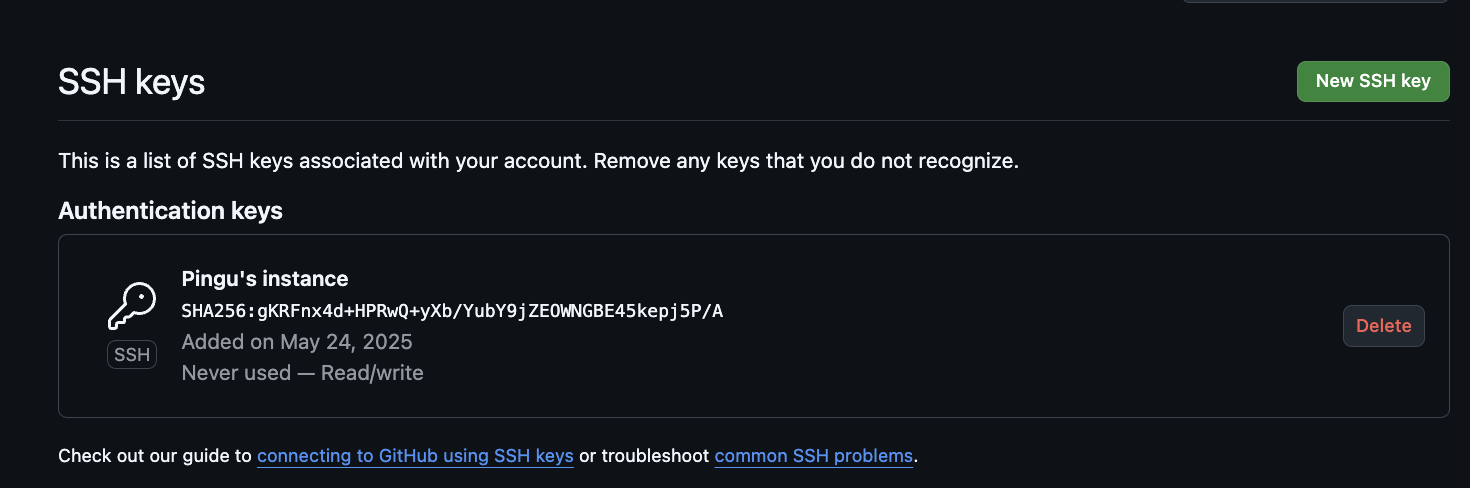

### **Run this in your Terminal**

<blockquote>

`ssh -T git@github.com`
    
You should see some variation on the below:
    
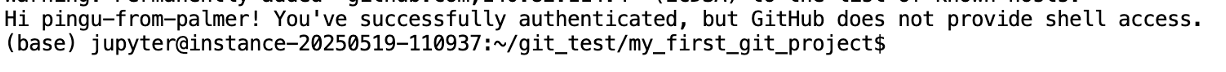

This output confirms that the SSH key works as intended. We are now ready to push our work to the remote repository.

## &nbsp;&nbsp; 6. &nbsp;&nbsp; Push local changes to a remote

Now that authentication is setup, we can return to the remote. This command will push the changes from our local repository (everything in the my_first_git_project folder) to the repository on GitHub:

In [ ]:
!git push origin main

If you look at your github penguins repository now you should see two new files: the .gitignore file and your R script. You successfully pushed your files from your local instance to a remote repository. 

We can pull changes from the remote repository to the local one as well using the following command:

In [ ]:
!git pull origin main

You will see that your files are already up to date, which makes sense because we just pushed the same files to the remote repository. 

---